# Determine "gaps" in continuous capturemode

there are some missing gaps in the long duration capture of oscilloscope data. Presummebly because of the limtied baud rate of the serial interface. Here, we try to determine how much data is loss by a slowly varying signal continuously and fit the piecewise data onto the expected signal.

Input signal is a 1 Hertz Sine wave with known amplitude. A zigzag wave was used as well.

In [61]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pickle
from quantiphy import Quantity as Q # pip3 install quantiphy
from scipy.signal import find_peaks
%matplotlib inline

In [112]:
datafolder="timing_folder_fast/"
all_files = [file for file in sorted(os.listdir(datafolder))]

In [113]:
%%time
datafolder = "timing_folder_fast/"
raw_data=[]
data = ""
with open(f"{datafolder}{all_files[0]}","r") as f:
    data = f.readlines()
raw_data.append( [int(d.split(",")[0]) for d in data[25:]] )
raw_data = np.array(raw_data)

CPU times: user 7.91 ms, sys: 0 ns, total: 7.91 ms
Wall time: 7.47 ms


In [114]:
header = data[:25]
header

['Format,1.0B,\n',
 'Memory Length,10000,\n',
 'IntpDistance,0,\n',
 'Trigger Address,4999,\n',
 'Trigger Level,1.192E-01,\n',
 'Source,CH2,\n',
 'Vertical Units,V,\n',
 'Vertical Units Div,0,\n',
 'Vertical Units Extend Div,16,\n',
 'Label,,\n',
 'Probe Type,0,\n',
 'Probe Ratio,1.000e+00,\n',
 'Vertical Scale,1.000e+00,\n',
 'Vertical Position,2.000e-01,\n',
 'Horizontal Units,S,\n',
 'Horizontal Scale,5.000E-09,\n',
 'Horizontal Position,0.000E+00,\n',
 'Horizontal Mode,Main,\n',
 'SincET Mode,Sinc20,\n',
 'Sampling Period,1.000e-09,\n',
 'Horizontal Old Scale,5.000E-09,\n',
 'Horizontal Old Position,0.000E+00,\n',
 'Firmware,V1.23,\n',
 'Mode,Fast,\n',
 'Waveform Data,\n']

In [115]:
%%time
all_data = dict()
raw_data=None;
for i,file in enumerate(all_files):
    data = ""
    with open(f"{datafolder}{file}","r") as f:
        data = f.readlines() 
    if file[0]=="2":
        raw_data= [int(d.split(",")[2]) for d in data[25:]]
    else:
        raw_data= [int(d.split(",")[0]) for d in data[25:]]
    raw_data = np.array(raw_data)
    
    if file[:6] not in all_data:
        all_data[file[:6]] = [ (raw_data,data[:25]) ]
    else:
        all_data[file[:6]].append((raw_data,data[:25]))

CPU times: user 3.01 s, sys: 44.1 ms, total: 3.05 s
Wall time: 3.75 s


In [116]:
fullarr=np.asarray([i[0] for i in all_data["1chSin"][::10]])
ylim= np.min(fullarr),np.max(fullarr)

In [124]:
sample_period=float(all_data["1chSin"][0][1][19].split(",")[1]);sample_period

1e-09

In [125]:
sample_period*1e4

1e-05

(-38, 47)

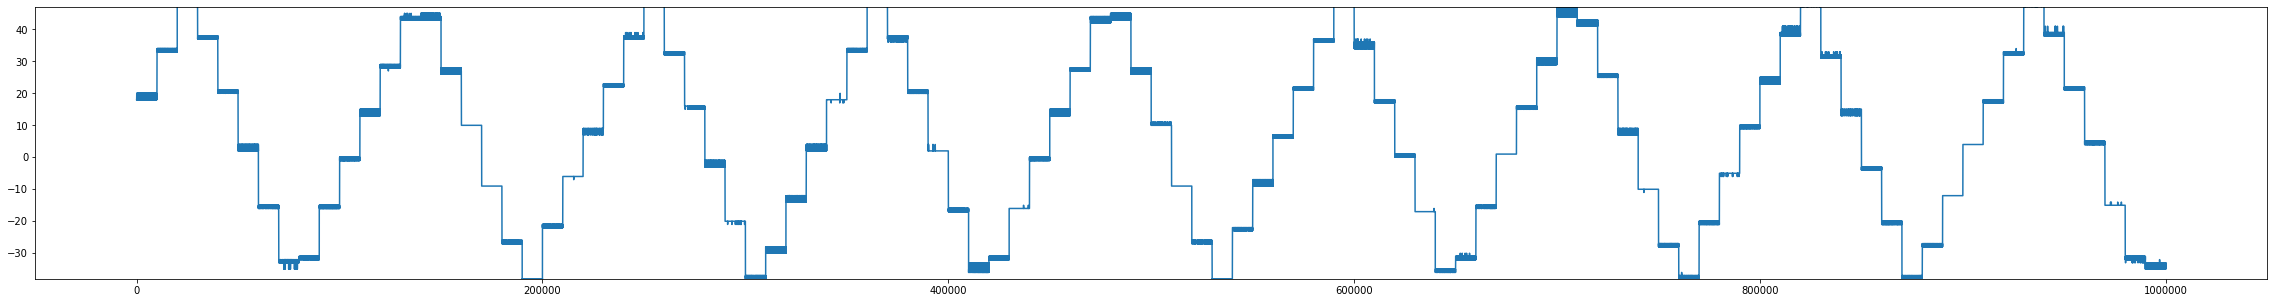

In [111]:
plt.figure(figsize=(40,5))
plt.plot((np.asarray([i[0][:] for i in all_data["1chSin"][:]])).reshape(-1));
plt.ylim(*ylim)

In [127]:
### 9 peaks = 9 seconds
### 100 screenshots, each 1e-05 seconds
fraction_sampled = sample_period*1e4*100/9
print(f"percent sampled = {fraction_sampled*100}%")

percent sampled = 0.011111111111111112%


In [118]:
scope_settings = [d[:-2] for i,d in list(enumerate(data)) if i in [4,12,13,15,19]]
print(scope_settings)
trigger_level = float(data[4].split(",")[1])
vert_scale = float(data[12].split(",")[1])
vert_pos = float(data[13].split(",")[1])
trigger_level,vert_scale,vert_pos,np.max(raw_data),np.min(raw_data)

['Trigger Level,1.192E-01,Trigger Level,1.192E-01', 'Vertical Scale,2.000e-02,Vertical Scale,1.000e+00', 'Vertical Position,-5.120e-02,Vertical Position,2.000e-01', 'Horizontal Scale,5.000E-09,Horizontal Scale,5.000E-09', 'Sampling Period,2.000e-09,Sampling Period,2.000e-09']


(0.1192, 0.02, -0.0512, -30, -31)